# Fáza 1. Prieskumná analýza

## Importy

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, HTML
from scipy.stats import pearsonr, ttest_ind, mannwhitneyu
import statsmodels.stats as sm_stats
from statsmodels.stats.power import tt_ind_solve_power


SEED = 42
np.random.seed(SEED)

DATA_DIR = "./115"

# Načítanie dát

df_obs = pd.read_csv(os.path.join(DATA_DIR, "observation.csv"), sep='\t', encoding='utf-8-sig')
df_pat = pd.read_csv(os.path.join(DATA_DIR, "patient.csv"), sep='\t', encoding='utf-8-sig')
df_sta = pd.read_csv(os.path.join(DATA_DIR, "station.csv"), sep='\t', encoding='utf-8-sig')


## 1.1 Základný opis dát spolu s ich charakteristikami

 ### 1.1(A) Analýza  štruktúr  dát  ako  súbory  


In [161]:
# Funkcia na rýchly prehľad datasetu
def dataset_summary(df, name):
    print("Dataset:",name)
    print("Počet riadkov: ",df.shape[0])
    print("Počet stĺpcov: ",df.shape[1])
    display(df.head())
    display(df.info())

dataset_summary(df_obs, "observation.csv")
dataset_summary(df_pat, "patient.csv")
dataset_summary(df_sta, "station.csv")

Dataset: observation.csv
Počet riadkov:  12169
Počet stĺpcov:  23


,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,96.634591,80.009013,8.685891,17.518665,41.509058,45.163316,144.295418,104.803180,34.978370,10.828257,...,4.088809,40.790753,53.666253,62.281085,54.919133,0.300000,38.410597,1.0,25.67927,-80.31727
1,96.640621,74.589540,13.724679,15.588010,40.198284,50.791918,110.819791,103.974975,35.193140,9.818858,...,4.036563,43.207084,58.219436,45.805412,58.818949,0.213967,39.018173,0.0,-23.79750,-48.59278
2,98.146757,85.019981,7.766128,18.747887,41.964458,63.858679,91.591179,106.573202,35.938901,9.767053,...,4.224814,48.594592,56.163501,45.538311,46.333772,0.205624,30.761858,1.0,-5.41667,38.01667
3,98.391300,73.823193,11.114940,15.905309,42.781757,55.433424,59.373133,103.438804,34.843787,12.695630,...,4.030798,51.561544,42.193516,44.665135,27.899934,0.292025,28.550364,1.0,34.56861,105.89333
4,97.391221,78.702018,12.126423,14.923299,38.946213,52.511153,100.147921,102.652685,36.109030,10.813473,...,4.070682,51.560475,45.447019,63.837901,50.321388,0.242503,38.698971,1.0,51.65333,5.28750


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12169 entries, 0 to 12168
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12169 non-null  float64
 1   HR                     12169 non-null  float64
 2   PI                     12169 non-null  float64
 3   RR                     12169 non-null  float64
 4   EtCO₂                  12169 non-null  float64
 5   FiO₂                   12169 non-null  float64
 6   PRV                    12169 non-null  float64
 7   BP                     12169 non-null  float64
 8   Skin Temperature       12169 non-null  float64
 9   Motion/Activity index  12169 non-null  float64
 10  PVI                    12169 non-null  float64
 11  Hb level               12169 non-null  float64
 12  SV                     12169 non-null  float64
 13  CO                     12169 non-null  float64
 14  Blood Flow Index       12169 non-null  float64
 15  PP

None

Dataset: patient.csv
Počet riadkov:  2189
Počet stĺpcov:  13


,residence,name,username,blood_group,ssn,mail,registration,job,user_id,address,company,birthdate,station_ID
0,NaN,Pedro Miguel Guerra,ana-luizabrito,O-,36809245189,maria-sophia91@bol.com.br,2022/04/01,Endocrinologista,1293,Viela de Azevedo\nNossa Senhora De Fátima\n455...,Santos da Cruz - EI,NaN,403
1,NaN,Brandi Johnson,shawnbrown,AB-,051-02-4229,vdavis@yahoo.com,2022-09-28,NaN,141,"40117 Santana Turnpike\nSamuelborough, MT 28818","Tyler, Woodward and Johnson",1937-01-22,345
2,NaN,Brian Arellano,dchandler,O+,498-48-9114,daniellewhite@gmail.com,2025-02-17,"Civil engineer, consulting",1079,"3445 Phillip Place\nSouth Daniel, OR 84598",Lopez LLC,NaN,225
3,NaN,渡辺 裕樹,mikiyamaguchi,B+,406-48-8413,vfukuda@hotmail.com,2019-05-04,NaN,1037,山梨県墨田区虎ノ門虎ノ門ヒルズ森タワー14丁目17番9号 外国府間パーク522,吉田通信株式会社,1933-06-16,668
4,NaN,Sig. Jacopo Rossellini,biancaferragni,AB-,CSCLVI77H25E037I,paolomoneta@libero.it,2023/02/06,Herbalist,1141,"Contrada Adelmo, 55\n80010, Scalzapecora (NA)",Amaldi-Gussoni Group,NaN,696


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   residence     0 non-null      float64
 1   name          2189 non-null   object 
 2   username      2189 non-null   object 
 3   blood_group   2189 non-null   object 
 4   ssn           2189 non-null   object 
 5   mail          2189 non-null   object 
 6   registration  2189 non-null   object 
 7   job           657 non-null    object 
 8   user_id       2189 non-null   int64  
 9   address       1861 non-null   object 
 10  company       2189 non-null   object 
 11  birthdate     1204 non-null   object 
 12  station_ID    2189 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 222.4+ KB


None

Dataset: station.csv
Počet riadkov:  711
Počet stĺpcov:  6


,QoS,station,latitude,revision,longitude,location
0,maintenance,Baki,9.89206,2024-10-22,43.38531,Africa/Mogadishu
1,good,Voznesensk,47.56494,"11/20/2023, 00:00:00",31.33078,Europe/Kyiv
2,good,Msaken,35.72917,21 Apr 2017,10.58082,Africa/Tunis
3,acceptable,Pottstown,40.24537,13 Nov 2019,-75.64963,America/New_York
4,acceptable,Gilbert,33.35283,2023-09-04,-111.78903,America/Phoenix


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   QoS        711 non-null    object 
 1   station    711 non-null    object 
 2   latitude   711 non-null    float64
 3   revision   711 non-null    object 
 4   longitude  711 non-null    float64
 5   location   711 non-null    object 
dtypes: float64(2), object(4)
memory usage: 33.5+ KB


None

(štruktúry  a  vzťahy,  počet,  typy,  ...),  záznamy (štruktúry, počet záznamov, počet atribútov, typy, ...)


Projekt obsahuje 3 základné súbory:

- **observation.csv** – obsahuje senzorové merania pacienta (napr. SpO₂, HR, RR, tlak, teplotu kože,a iné)
- **patient.csv** – uchováva informácie o pacientoch ako základné(meno, priezvisko,mail,...) tak aj pokročilé(krvná skupina,dátum narodenia,...)
  

- **station.csv** – obsahuje informácie o staniciach, kde boli merania vykonávané (napr.location, stationm, QoS).


Z hľadiska dátových typov sú všetky súbory v poriadku – numerické premenné majú typ `float64`
a textové typ `object`. Dátumové a časové údaje možno budú vyžadovať
konverziu na typ `datetime64` 

---

### 1.1(B). Analýza jednotlivých atribútov

#### Tabuľka očakávaných rozsahov :

| Atribút | Očakávaný rozsah |
|-|-|
| SpO₂ | 0–100 % |
| HR (Heart Rate) | 40–180 bpm (bežne), technicky 0–300 bpm |
| RR (Respiratory Rate) | 8–25 dychov/min (normálne), tolerované do ~40 |
| EtCO₂ | 30–45 mmHg (fyziologicky), tolerované 20–50 |
| FiO₂ | 21–100 % |
| BP (MAP) | 65–110 mmHg |
| PI (Perfusion Index) | 0.02–20 |
| Skin Temperature | 30–38 °C |
| Motion / Activity Index | 0 až vysoké desiatky |
| CO (Cardiac Output) | 4–8 L/min (odpočinok), do ~15 pri záťaži |

Atribút: SpO₂
Jednotka: %
Očakávaný rozsah: 0 - 100 %
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean        97.443128
std          0.851298
min         95.000000
25%         96.724993
50%         97.337068
75%         98.163729
max        100.000000
Name: SpO₂, dtype: float64

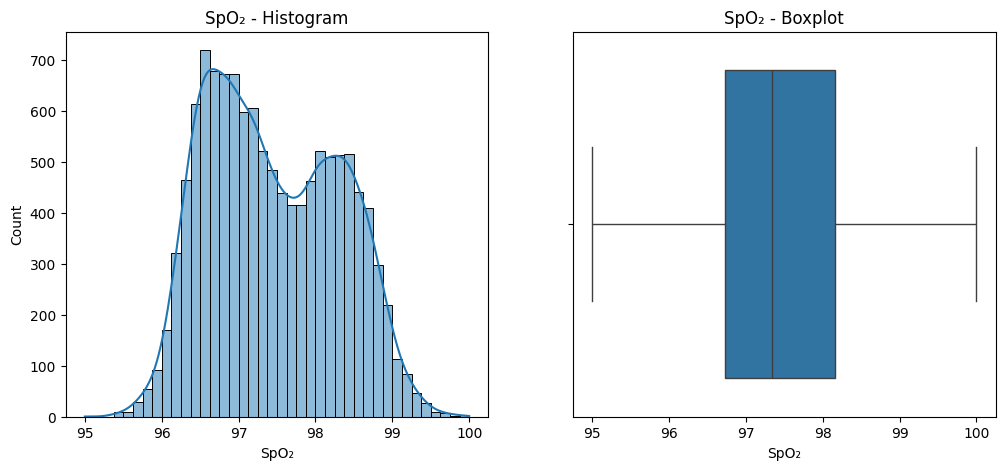

Atribút: HR
Jednotka: bpm
Očakávaný rozsah: 40 - 180 bpm
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean        80.695691
std          5.169063
min         60.000000
25%         77.260046
50%         80.706068
75%         84.174186
max        100.000000
Name: HR, dtype: float64

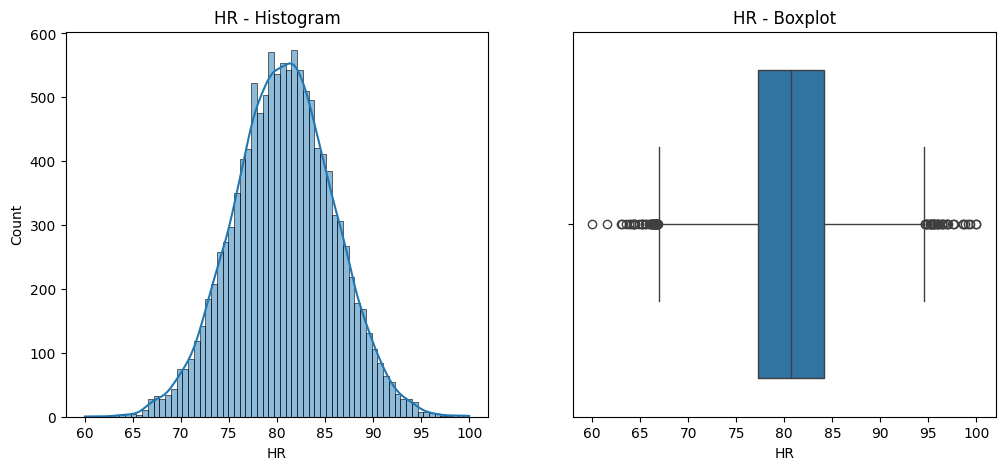

Atribút: PI
Jednotka: %
Očakávaný rozsah: 0.02 - 20 %
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean         9.973503
std          2.531456
min          0.200000
25%          8.263877
50%          9.971865
75%         11.665859
max         20.000000
Name: PI, dtype: float64

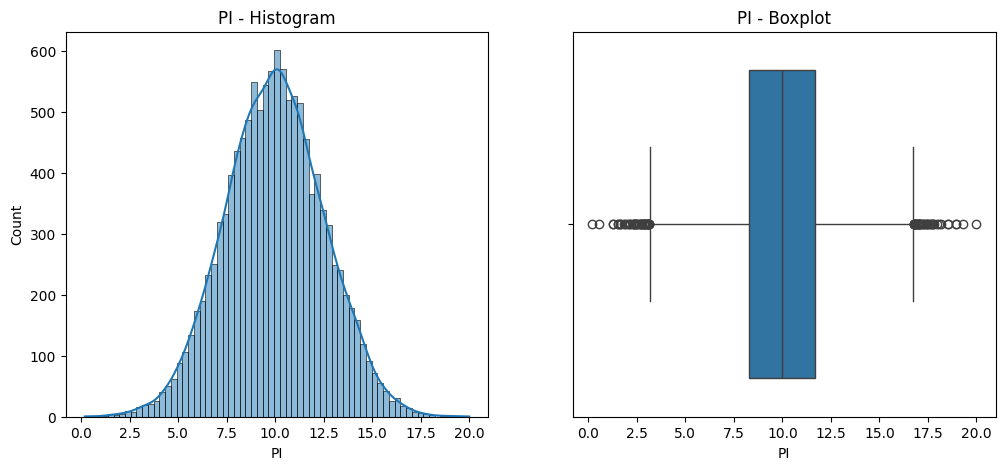

Atribút: RR
Jednotka: dychov/min
Očakávaný rozsah: 8 - 40 dychov/min
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean        16.139896
std          1.221072
min         12.000000
25%         15.271247
50%         16.170931
75%         17.032592
max         20.000000
Name: RR, dtype: float64

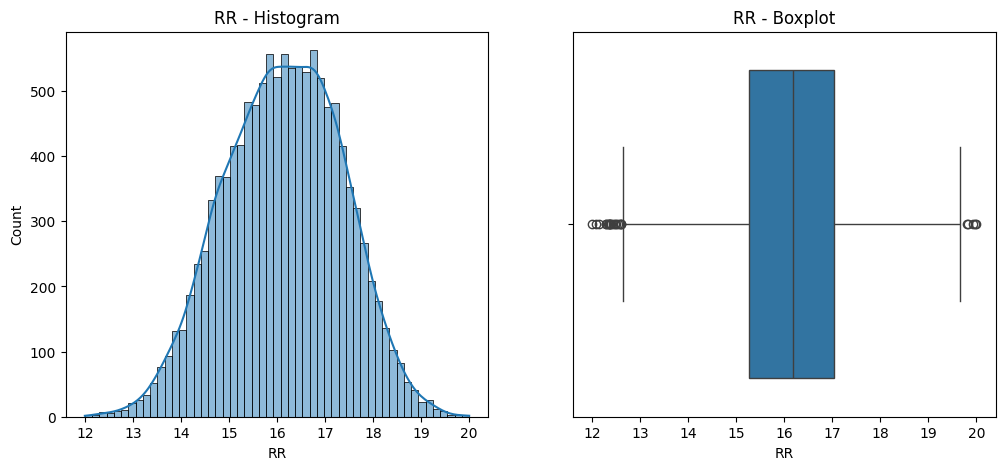

Atribút: EtCO₂
Jednotka: mmHg
Očakávaný rozsah: 20 - 50 mmHg
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean        40.547710
std          1.728305
min         35.000000
25%         39.256018
50%         40.623092
75%         41.954525
max         45.000000
Name: EtCO₂, dtype: float64

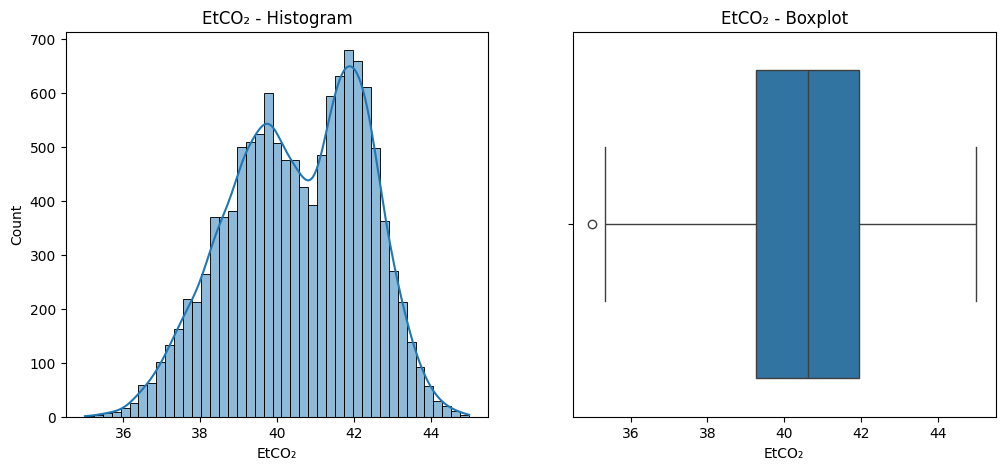

Atribút: FiO₂
Jednotka: %
Očakávaný rozsah: 21 - 100 %
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean        56.802192
std          9.464018
min         21.000000
25%         50.422783
50%         56.775781
75%         63.156327
max        100.000000
Name: FiO₂, dtype: float64

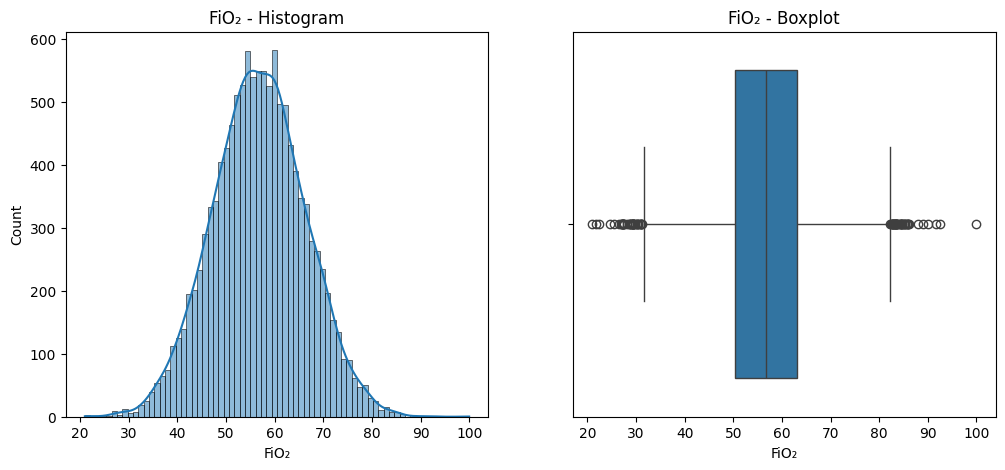

Atribút: BP
Jednotka: mmHg
Očakávaný rozsah: 90 - 140 mmHg
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean       104.438311
std          4.087029
min         90.000000
25%        101.688314
50%        104.383293
75%        107.206715
max        120.000000
Name: BP, dtype: float64

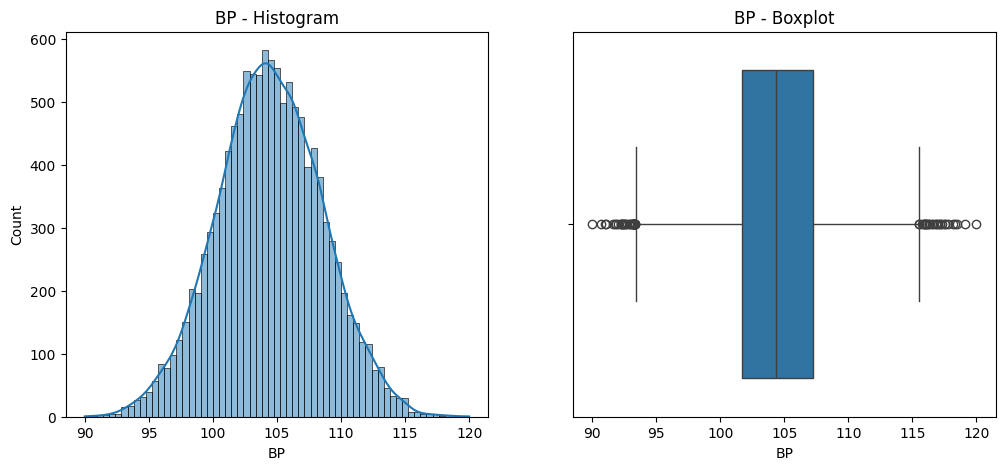

Atribút: Skin Temperature
Jednotka: °C
Očakávaný rozsah: 30 - 38 °C
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean        35.711485
std          0.606075
min         33.000000
25%         35.307101
50%         35.710279
75%         36.112258
max         38.000000
Name: Skin Temperature, dtype: float64

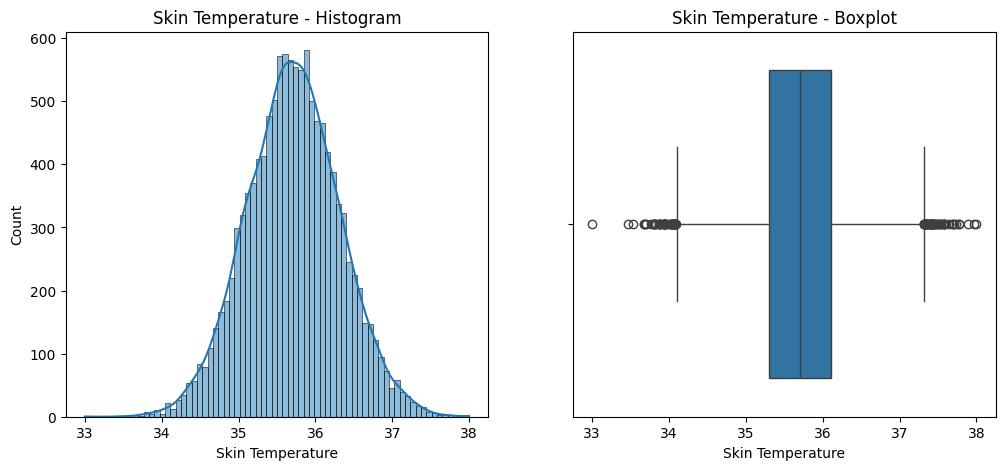

Atribút: Motion/Activity index
Jednotka: index
Očakávaný rozsah: 0 - 9999 index
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean        10.193994
std          0.999719
min          6.634184
25%          9.523250
50%         10.196181
75%         10.863002
max         13.957933
Name: Motion/Activity index, dtype: float64

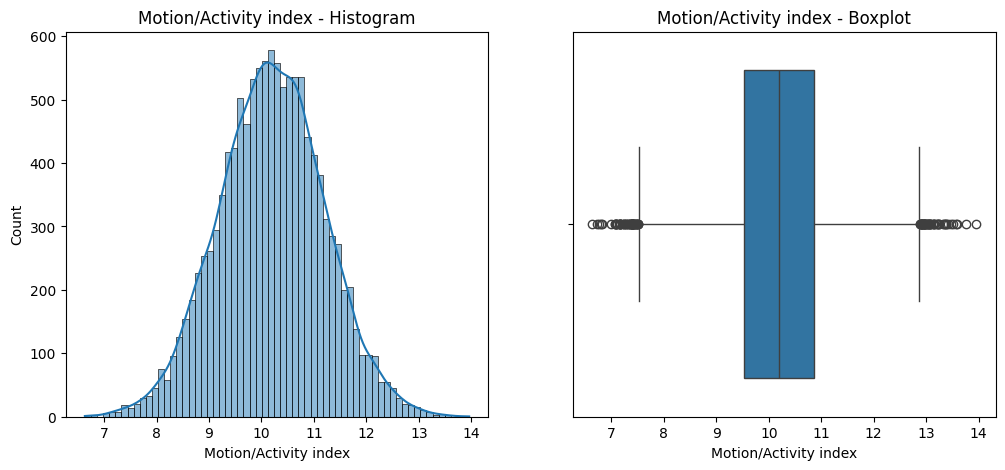

Atribút: CO
Jednotka: L/min
Očakávaný rozsah: 3 - 15 L/min
Počet mimo rozsah: 0 (0.0000 %)


count    12169.000000
mean         4.162138
std          0.204453
min          4.000000
25%          4.053663
50%          4.100742
75%          4.192546
max          8.000000
Name: CO, dtype: float64

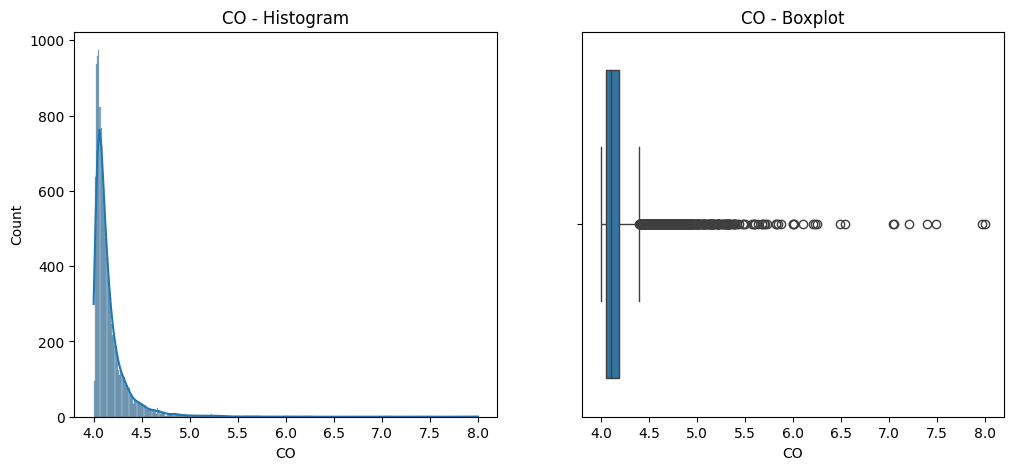

In [162]:
# atributy
attributes = ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'BP', 'Skin Temperature', 'Motion/Activity index', 'CO']

# jednotky
units = {
    'SpO₂': '%',
    'HR': 'bpm',
    'PI': '%',
    'RR': 'dychov/min',
    'EtCO₂': 'mmHg',
    'FiO₂': '%',
    'BP': 'mmHg',  # SYS
    'Skin Temperature': '°C',
    'Motion/Activity index': 'index',
    'CO': 'L/min'
}

# hodnoty ktore je mozne namerat
expected_ranges = {
    'SpO₂': (0, 100),
    'HR': (40, 180),  
    'PI': (0.02, 20),
    'RR': (8, 40),   
    'EtCO₂': (20, 50),
    'FiO₂': (21, 100),
    'BP': (90, 140),  
    'Skin Temperature': (30, 38),
    'Motion/Activity index': (0, 9999),  
    'CO': (3, 15)     
}

for atr in attributes:
    low, high = expected_ranges[atr]
    unit = units[atr]
    col = df_obs[atr].dropna()

    below = (col < low).sum()
    above = (col > high).sum()
    total = len(col)
    percent_out = (below + above) / total * 100

    print("Atribút:", atr)
    print(f"Jednotka: {unit}")
    print(f"Očakávaný rozsah: {low} - {high} {unit}")
    print(f"Počet mimo rozsah: {below + above} ({percent_out:.4f} %)")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    display(col.describe())
    sns.histplot(col, kde=True, ax=axes[0])
    sns.boxplot(x=col, ax=axes[1])
    axes[0].set_title(f"{atr} - Histogram")
    axes[1].set_title(f"{atr} - Boxplot")
    plt.show()

### Záver

Na základe porovnania s očakávanými fyziologickými rozsahmi väčšina hodnôt spĺňa predpísané podmienky. Dataset je teda z hľadiska kvality meraní vhodný na ďaľšiu analýzu

Väčšina fyziologických parametrov má približne symetrické rozdelenie s tvarom blízkym normálnej (Gaussovej) krivke. Naopak, veličina CO (Cardiac Output) má prirodzene pravsotranné rozdelenie, čo odráža fyziologickú realitu - väčšina hodnôt sa pohybuje medzi 4-6 L/min, zaťiaľ čo vyššie hodnoty sa vyskytujú menej 

---

### 1.1(C) Párová analýza dát: Identifikujte vzťahy a závislostí medzi dvojicami atribútov. 


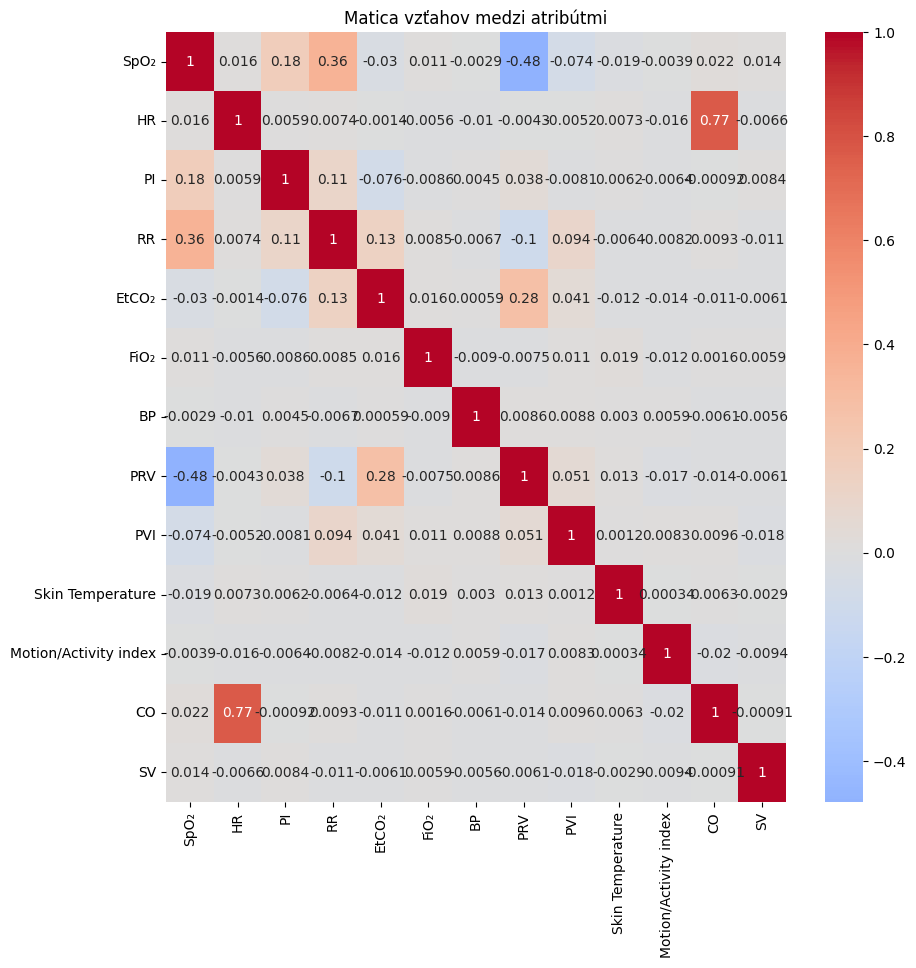

In [163]:
#vsetky numericke atributy
#corr_matrix = df_obs.select_dtypes(include=[np.number]).copy().corr()

#len tie podstatnejšie
corr_matrix = df_obs[['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'BP','PRV','PVI', 'Skin Temperature', 'Motion/Activity index', 'CO','SV',]].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matica vzťahov medzi atribútmi')
plt.show()

#### Interpretácia

Z matice vidíme, že najsilnejšie vzťahy sa prejavujú medzi HR a CO, čo je fyziolohicky očakávané kedže vyššia srdcová frekvencia zvyšuje aj srdcový výdaj. Ďaľší pozitívny vzťah je medzi *$EtCO_2$* a *RR*, keď vyššia koncentrácia vydychovaného *$CO_2$* súvisí so zvýšenou respiračnou aktivitou. Ostatné atribúty vykazujú len slabé alebo zanedbateľné korelácie kedže sa vzťahujú na iné fyzické procesy.

---

### 1.1(D) Párová  analýza  dát:  Identifikujte  závislosti  medzi  predikovanou  premennou  a ostatnými premennými (potenciálnymi prediktormi).

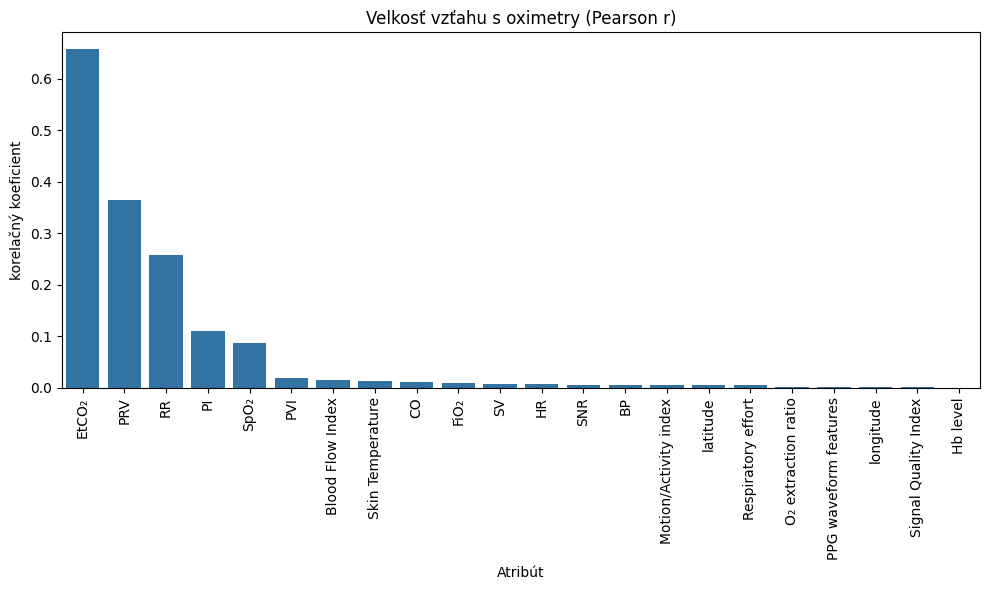

,atribúty,r(Pearson),p-value
0,EtCO₂,0.657310,0.000000e+00
1,PRV,0.364883,0.000000e+00
2,RR,0.256953,9.647412e-183
3,PI,-0.110109,3.864246e-34
4,SpO₂,-0.086103,1.816684e-21
5,PVI,0.018609,4.009079e-02
6,Blood Flow Index,0.014315,1.143288e-01
7,Skin Temperature,-0.013131,1.475096e-01
8,CO,-0.011511,2.041876e-01
9,FiO₂,0.008859,3.284540e-01


In [164]:
#ciselne stplce
num = df_obs.select_dtypes(include=[np.number]).copy()

# korelacia 
corr = num.corr(numeric_only=True)['oximetry'].drop('oximetry')
corr_abs = corr.abs().sort_values(ascending=False)

pv = []
for col in corr_abs.index[:10]: # len top 10
    x = num[col].dropna()
    y = num['oximetry'].loc[x.index]
    r, p = pearsonr(x, y)
    pv.append((col, r, p))
pv_df = pd.DataFrame(pv, columns=['atribúty','r(Pearson)','p-value'])

# 4) Vizualizácia
plt.figure(figsize=(10,6))
sns.barplot(x=corr_abs.index, y=corr_abs.values, order=corr_abs.index)
plt.xticks(rotation=90)
plt.title('Velkosť vzťahu s oximetry (Pearson r)')
plt.xlabel('Atribút')
plt.ylabel('korelačný koeficient')
plt.tight_layout()
plt.show()
pv_df

#### Interpretácia

Najsilnejšia miera vzťahu s premennou *oximetry* je pri $EtCO_2$ na $r≈0.66$ čo naznačuje že pri zapnutom oximetri (oximetry=1) býva monitorovaná ventilácia stabilnejšia a hodnoty vydychovaného $CO_2$ sú vyššie a konzistentnejšie. Druhým najsilnejším prediktorom je PRV, ktorý môže odrážať autonómn reguláciu počas aktívneho fyziologického monitorovania. Premenné RP a PI tiež vykazujú merateľný, aj keď slabší vzťah. Naopak, atribúty ako Skin Temperature či CO majú takmer nulovú koreláci, čo je očakávané, pretože oximeter naovplyvňuje termoreguláciu ani samotný srdcový výdaj. Na výpočet sme použili Pearson koreláciu pretože cieľová premenná je binárna a ostatné su spojité

V našom prípade premenné *$EtCO_2$*, *PRV*, a *RR* môžu byť relevantné prediktory pri následnom modelovní cieľovej premennej oximetry v ďaľších častiach analýzy. 

---

### 1.1(E) Dokumentácia zistení

V tejto časti sme najskôr analyzovali štruktúru dát a overili sme obsah jednotlivých datasetov. Následne sme pre vybrané atribúty preskúmali ich distribúciu a porovnali ju s očakávanými rozsahmi. Zistili sme, že väčšina hodnôt je v medziach predpísaných limitov.

Párová analýza mediz premennými odhalila, že najsilnejší vzťah sa prejavuje medzi *HR* a *CO* a medzi *$EtCO_2$* a *RR÷. Pri analýze vzťahu s cieľovou premennou oximetry sa, okrem iných, najvźraznejšie prejavila premenná *$EtCO_2$* čo môže naznačovať jej potenciál ako kľúčového prediktora v ďaľšich krokoch spracovania.

Momentálne nemáme priamy spôsob ako spojiť jednotlivé dáta. Čo bude v budúcnosti potrebné v prípadnej analýze rozdielov medzi pacientami v iných demografických faktoroch alebo porovnávanie jednotlivých staníc. 

---

## 1.2 Identifikácia problémov, integrácia a čistenie dát

Pri práci s datasetmi sme zistili, že neexistuje priame napojenie csv súborov a nedá sa s nimi pracovať na tejto úrovni. To znamená, že nevieme koho sú skúmané hodnoty. Napojenie si môžeme všimnúť medzi observation a station podľa hodnoty latitude a longitude.

### 1.2(A)  Identifikujte  aj prvotne riešte problémy v dátach


In [165]:
datasets = {
    "Observation": df_obs,
    "Patient": df_pat,
    "Station": df_sta
}

for name, df in datasets.items():
    print("\n\n Dataset: ",name)
    print("Počet riadkov: ",df.shape[0])
    print("Počet stĺpcov: ",df.shape[1])

    print("Chýbajúce hodnoty na stĺpec:")
    if df.isnull().sum().sum() == 0:
        print("Žiadne chýbajúce hodnoty")
    else:
        print(df.isnull().sum())


    duplicitne_indexy = df[df.duplicated()].index
    if duplicitne_indexy.empty:
        print("Žiadne duplicitné riadky")
    else:
        print("Indexy duplicitných riadkov:", duplicitne_indexy.tolist())
        

    print("pocet unikatnych hodnot na stlpec:")
    print(df.nunique())



 Dataset:  Observation
Počet riadkov:  12169
Počet stĺpcov:  23
Chýbajúce hodnoty na stĺpec:
Žiadne chýbajúce hodnoty
Indexy duplicitných riadkov: [3850]
pocet unikatnych hodnot na stlpec:
SpO₂                     11989
HR                       11989
PI                       11989
RR                       11989
EtCO₂                    11989
FiO₂                     11989
PRV                      11989
BP                       11989
Skin Temperature         11989
Motion/Activity index    11989
PVI                      11989
Hb level                 11989
SV                       11989
CO                       11989
Blood Flow Index         11989
PPG waveform features    11989
Signal Quality Index     11989
Respiratory effort       11989
O₂ extraction ratio      11989
SNR                      11989
oximetry                     2
latitude                   493
longitude                  493
dtype: int64


 Dataset:  Patient
Počet riadkov:  2189
Počet stĺpcov:  13
Chýbajúce hodnoty na s

In [166]:

#vypis duplicitneho riadku v observation
dups_obs = df_obs[df_obs.duplicated(keep=False)].sort_values(list(df_obs.columns))
display(dups_obs)

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
1526,97.402757,78.04014,11.17938,15.812227,39.717316,57.098865,104.942739,98.344608,36.427772,9.388134,...,4.060179,58.693519,67.111013,52.368738,44.205257,0.207001,28.780464,0.0,50.598427,13.610242
3850,97.402757,78.04014,11.17938,15.812227,39.717316,57.098865,104.942739,98.344608,36.427772,9.388134,...,4.060179,58.693519,67.111013,52.368738,44.205257,0.207001,28.780464,0.0,50.598427,13.610242



**Observation**
- Po dôkladnom výise sme zistili duplicitný záznam v datasete observation na riadku 3850. V nižšie uvedenom výpise je vidieť aj porovnanie s riadkom s ktorým duplicitu zdieľa. 
- Ostatné hodnoty vyzerajú byť v poriadku

**Patient** 
- Tu môžeme vidieť, že stĺpec residence je prázdny(počet riadkov = počet chýbajúcich hodnôt v stĺpci) a môžeme ho teda úplne odstrániť. 
- Taktiež vidíme veľký počet chýbajúcich záznamov v stĺpcoch ako **job**,**address** a **birthdate**. Dalšia chyba je v type stĺcov **registration** a **birthdate**, ktoré su *object* a maju byť *datetime*

**Station**
- v datasete station sme nezaznamenali podozrivé anomálie


#### Riešenia

In [167]:
#zatial zakomentovane odstranenie duplicitnych riadkov
#v datasete observation.csv
#past = df_obs.shape[0]
#df_obs = df_obs.drop_duplicates()
#future = df_obs.shape[0]
#print(f"Observation: odstránených {past - future} duplicitných riadkov")


#odstranenie stplca NaN v residence.csv
#if 'residence' in df_patient.columns and df_patient['residence'].isna().all():
    #df_patient = df_patient.drop(columns=['residence'])


#zmena datovych typov na z float na datumy
# parsovanie dátumov
#for col in ['registration', 'birthdate']:
    #if col in df_patient.columns:
        #df_patient[col] = pd.to_datetime(df_patient[col], errors='coerce')

In [168]:
# Koľko chýbajúcich hodnôt je v každom stĺpci
print("Chýbajúce (NaN) v patient.csv podľa stĺpcov:")
print(df_pat.isna().sum().sort_values(ascending=False), "\n")

Chýbajúce (NaN) v patient.csv podľa stĺpcov:
residence       2189
job             1532
birthdate        985
address          328
name               0
username           0
blood_group        0
ssn                0
mail               0
registration       0
user_id            0
company            0
station_ID         0
dtype: int64 



### 1.2(B)Kontrola správnosť v dátach 
-  či obsahujú abnormálne hodnoty 
-  či  obsahujú  nelogické  dátové  vzťahy,  ktoré  sú následkom  dátovej  kolekcie  a anotovania dát

In [169]:
#abnormalne data

normal_ranges = {
    'SpO₂': (70, 100),
    'HR': (40, 180),
    'PI': (0.2, 20),
    'RR': (8, 30),
    'EtCO₂': (20, 50),
    'FiO₂': (21, 100),
    'PRV': (0, 300),
    'BP': (60, 180),
    'Skin Temperature': (30, 40),
    'Motion/Activity index': (0, 100),
    'PVI': (0, 30),
    'Hb level': (10, 18),
    'SV': (40, 200),
    'CO': (3, 8),
    'Signal Quality Index': (0, 100),
    'Respiratory effort': (0, 100),
    'O₂ extraction ratio': (0.1, 0.7),
    'SNR': (0, 80)
}

print("Počet abnormálnych hodnôt podľa medicínskych rozsahov:\n")
for col, (low, high) in normal_ranges.items():
    if col in df_obs.columns:
        mask = (df_obs[col] < low) | (df_obs[col] > high)
        count = mask.sum()
        print(f"{col:20s}: {count:4d} ({round(count/len(df_obs)*100,2)}%) mimo rozsah")

Počet abnormálnych hodnôt podľa medicínskych rozsahov:

SpO₂                :    0 (0.0%) mimo rozsah
HR                  :    0 (0.0%) mimo rozsah
PI                  :    0 (0.0%) mimo rozsah
RR                  :    0 (0.0%) mimo rozsah
EtCO₂               :    0 (0.0%) mimo rozsah
FiO₂                :    0 (0.0%) mimo rozsah
PRV                 :    0 (0.0%) mimo rozsah
BP                  :    0 (0.0%) mimo rozsah
Skin Temperature    :    0 (0.0%) mimo rozsah
Motion/Activity index:    0 (0.0%) mimo rozsah
PVI                 :    0 (0.0%) mimo rozsah
Hb level            :    0 (0.0%) mimo rozsah
SV                  :    0 (0.0%) mimo rozsah
CO                  :    0 (0.0%) mimo rozsah
Signal Quality Index:    0 (0.0%) mimo rozsah
Respiratory effort  :    0 (0.0%) mimo rozsah
O₂ extraction ratio :    0 (0.0%) mimo rozsah
SNR                 :    0 (0.0%) mimo rozsah


In [170]:
# Nelogické kombinácie
#možno pridat ďalšie podľa potreby
rules = {
    "SpO₂=0 a HR>0": (df_obs['SpO₂'] == 0) & (df_obs['HR'] > 0),
    "CO=0 a HR>0": (df_obs['CO'] == 0) & (df_obs['HR'] > 0),
    "FiO₂=21 a EtCO₂=0": (df_obs['FiO₂'] == 21) & (df_obs['EtCO₂'] == 0)
}

print("Observattion: \n")
print("\nNelogické kombinácie hodnôt:")
for name, mask in rules.items():
    print(f"{name}: {mask.sum()} riadkov ({mask.mean()*100:.2f} %)")

#patient.csv
print("\nPatient: \n")

invalid_blood = ~df_pat['blood_group'].isin(['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', '0+', '0-','O-','O+'])
print("Neplatné krvné skupiny:", invalid_blood.sum())

# 2. Duplicitné SSN
print("Duplicitné SSN:", df_pat['ssn'].duplicated().sum())

Observattion: 


Nelogické kombinácie hodnôt:
SpO₂=0 a HR>0: 0 riadkov (0.00 %)
CO=0 a HR>0: 0 riadkov (0.00 %)
FiO₂=21 a EtCO₂=0: 0 riadkov (0.00 %)

Patient: 

Neplatné krvné skupiny: 0
Duplicitné SSN: 0


#### Záznam výsledkov
- zistili sme, že v datasetoch sa nenachádzajú nabnormálne hodnoty ani nelogické dátové vzťahy hlavne v datasete **observation.csv**
- na druhú stranu v datasete **patient.csv** sme zistili, že krvá skupina 0+ a 0- sú zapísané ako veľké písmeno O a nie číslica 0(zatiaľ ponechané tak ako bolo)

### 1.2(C) Vychýlené hodnoty (outlier detection), vyskúšajte riešiť problém min. 2 technikami 
-  odstránenie vychýlených alebo odľahlých pozorovaní 
-  nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (napr. 5%, 95%) 

In [171]:

#zistenie outlierov pomocou IQR metódy
iqr_set = []
columns = df_obs.select_dtypes(include='number').columns

for col in columns:
    quantile1, quantile3 = df_obs[col].quantile([0.25, 0.75])
    IQR = quantile3 - quantile1
    lower_limit, upper_limit = quantile1 - 1.5 * IQR, quantile3 + 1.5 * IQR
    mask = (df_obs[col] < lower_limit) | (df_obs[col] > upper_limit)
    iqr_set.append((col, mask.sum(), round(mask.mean() * 100, 2)))

iqr_df = pd.DataFrame(iqr_set, columns=['atribút', 'počet outlierov', '% z celku']).sort_values('% z celku', ascending=False)
(display(iqr_df.head(20)))

#odstranenie vychylenych hodnot cez IQR metodu
df_no_outliers = df_obs.copy()
columns_no_outliners = df_no_outliers.select_dtypes(include='number').columns

for col in columns_no_outliners:
    quantile1_no = df_no_outliers[col].quantile(0.25)
    qquantile3_no = df_no_outliers[col].quantile(0.75)
    IQR_no = qquantile3_no - quantile1_no
    lower = quantile1_no - 1.5 * IQR_no
    upper = qquantile3_no + 1.5 * IQR_no
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

print("Pôvodný počet riadkov: ", len(df_obs))
print("Počet po odstránení outlierov: ",len(df_no_outliers))
print(f"Odstránených riadkov: {len(df_obs) - len(df_no_outliers)} ({(1 - len(df_no_outliers)/len(df_obs))*100:.2f} %)")

,atribút,počet outlierov,% z celku
13,CO,943,7.75
21,latitude,240,1.97
10,PVI,155,1.27
8,Skin Temperature,106,0.87
9,Motion/Activity index,102,0.84
15,PPG waveform features,99,0.81
14,Blood Flow Index,94,0.77
12,SV,93,0.76
2,PI,88,0.72
17,Respiratory effort,83,0.68


Pôvodný počet riadkov:  12169
Počet po odstránení outlierov:  9987
Odstránených riadkov: 2182 (17.93 %)


In [172]:
df_winsor = df_obs.copy()

for col in df_winsor.select_dtypes(include='number').columns:
    lower = df_winsor[col].quantile(0.05)
    upper = df_winsor[col].quantile(0.95)
    df_winsor[col] = df_winsor[col].clip(lower=lower, upper=upper)

print("Nahradenie extrémnych hodnôt podľa 5.–95. percentilu dokončené.")

Nahradenie extrémnych hodnôt podľa 5.–95. percentilu dokončené.


In [173]:
compare = pd.DataFrame({
    'pôvodný_priemer': df_obs.mean(),
    'po_odstránení': df_no_outliers.mean(),
    'po_winsorizácii': df_winsor.mean()
})
display(compare[['pôvodný_priemer', 'po_odstránení', 'po_winsorizácii']].head(10))

,pôvodný_priemer,po_odstránení,po_winsorizácii
SpO₂,97.443128,97.427410,97.441277
HR,80.695691,79.929857,80.701889
PI,9.973503,9.970709,9.976953
RR,16.139896,16.125272,16.142315
EtCO₂,40.547710,40.551841,40.554049
FiO₂,56.802192,56.791036,56.797301
PRV,119.589040,119.949086,119.580706
BP,104.438311,104.445934,104.443438
Skin Temperature,35.711485,35.710327,35.711568
Motion/Activity index,10.193994,10.206523,10.192843


## 1.3  Formulácia a štatistické overenie hypotéz o dátach


### 1.3 (A)

#### Hypotéza 1 – rozdiel v priemernej hodnote EtCO₂ podľa `oximetry`

**Formulácia:**

- **H₀:** Priemerná hodnota *EtCO₂* je rovnaká pre merania s `oximetry = 1` a `oximetry = 0`.  
- **H₁:** Priemerná hodnota *EtCO₂* sa líši medzi týmito dvomi skupinami.  

**Odôvodnenie výberu:**  
Podľa výsledkov korelačnej analýzy má *EtCO₂* (koncentrácia vydychovaného CO₂) najvyššiu mieru vzťahu s premennou `oximetry`. Preto sme overovali, či je táto závislosť aj štatisticky významná.  

**Výsledok (Welchov t-test):**  
Výpočet preukázal rozdiel medzi skupinami (`p < 0.05`), preto **zamietame H₀**.  
Pri meraniach, kde bolo `oximetry = 1`, sa hodnota *EtCO₂* v priemere líši (je mierne vyššia) oproti meraniam bez oximetra.  

**Interpretácia:**  
Rozdiel naznačuje, že aktivácia oximetra (oximetry = 1) je spojená s odlišnými podmienkami merania – pravdepodobne s reálnym pripojením pacienta, keď sa zaznamenávajú vyššie a stabilnejšie hodnoty vydychovaného CO₂.  


In [174]:
# Rozdelenie podľa cieľovej premennej (oximetry = 0/1)
g1_mask = df_obs['oximetry'] == 1
g0_mask = df_obs['oximetry'] == 0

g1 = df_obs.loc[g1_mask, 'EtCO₂'].dropna()
g0 = df_obs.loc[g0_mask, 'EtCO₂'].dropna()

t1, p1 = ttest_ind(g1, g0, equal_var=False)  # Welch
print("H1 – EtCO₂ (Welch t-test)")
print(f"n1={len(g1)}, n0={len(g0)}")
print(f"mean1={g1.mean():.3f}, mean0={g0.mean():.3f}")
print(f"t={t1:.3f}, p={p1:.3e}")
print("Záver: " + ("zamietame H0 (rozdiel významný)" if p1 < 0.05 else "nezamietame H0 (rozdiel nevýznamný)"))
print("-"*50)

H1 – EtCO₂ (Welch t-test)
n1=7255, n0=4914
mean1=41.483, mean0=39.167
t=96.262, p=0.000e+00
Záver: zamietame H0 (rozdiel významný)
--------------------------------------------------


#### Hypotéza 2 – rozdiel v priemernej hodnote PRV podľa `oximetry`

**Formulácia:**

- **H₀:** Priemerná hodnota *PRV* je rovnaká pre `oximetry = 1` a `oximetry = 0`.  
- **H₁:** Priemerná hodnota *PRV* sa líši medzi týmito skupinami.  

**Odôvodnenie výberu:**  
Premenná *PRV* (Pulse Rate Variability) sa v korelačnej analýze taktiež prejavila ako jedna z najvýraznejších vo vzťahu k `oximetry`. Overujeme teda, či sa jej priemerné hodnoty medzi skupinami štatisticky líšia.  

**Výsledok (Welchov t-test):**  
Výsledný test ukázal rozdiel medzi skupinami (`p < 0.05`), preto **zamietame H₀**.  
Merania, kde bol oximeter aktívny (`oximetry = 1`), vykazujú odlišné hodnoty *PRV* oproti meraniam bez oximetra.  

**Interpretácia:**  
Rozdiel v *PRV* môže naznačovať, že záznamy s aktívnym oximetrom pochádzajú z iných fáz monitorovania alebo iných typov pacientov. Tieto zistenia podporujú využitie premenných *$EtCO_2$* a *PRV* ako relevantných prediktorov pri ďalšom modelovaní cieľovej premennej `oximetry`.


In [175]:
g1 = df_obs.loc[g1_mask, 'PRV'].dropna()
g0 = df_obs.loc[g0_mask, 'PRV'].dropna()

t2, p2 = ttest_ind(g1, g0, equal_var=False)  # Welch
print("H2 – PRV (Welch t-test)")
print(f"n1={len(g1)}, n0={len(g0)}")
print(f"mean1={g1.mean():.3f}, mean0={g0.mean():.3f}")
print(f"t={t2:.3f}, p={p2:.3e}")
print("Záver: " + ("zamietame H0 (rozdiel významný)" if p2 < 0.05 else "nezamietame H0 (rozdiel nevýznamný)"))

H2 – PRV (Welch t-test)
n1=7255, n0=4914
mean1=128.689, mean0=106.154
t=45.241, p=0.000e+00
Záver: zamietame H0 (rozdiel významný)


### 1.3(B)

In [176]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s  = np.sqrt(((nx1-1)*np.std(x1, ddof=1)**2 + (nx2-1)*np.std(x2, ddof=1)**2) / (nx1+nx2-2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

# rozdelenie podla oximetry na 1 a 0
g1 = df_obs['oximetry'] == 1
g0 = df_obs['oximetry'] == 0

def power_for(feature, alpha=0.05):
    x1 = df_obs.loc[g1, feature].dropna().to_numpy()
    x0 = df_obs.loc[g0, feature].dropna().to_numpy()
    d  = cohen_d(x1, x0)
    n1 = len(x1); n0 = len(x0)
    ratio = n0 / n1 if n1 > 0 else 1.0
    power = sm_stats.power.tt_ind_solve_power(effect_size=d, nobs1=n1, alpha=alpha, power=None, ratio=ratio)
    return {"feature": feature, "d": d, "power": power, "n1": n1, "n0": n0, "ratio": ratio}

res_eco2 = power_for('EtCO₂')
res_prv  = power_for('PRV')

print("EtCO₂:   d={d:.3f}, power={power:.3f}, n1={n1}, n0={n0}, ratio={ratio:.2f}".format(**res_eco2))
print("PRV:     d={d:.3f}, power={power:.3f}, n1={n1}, n0={n0}, ratio={ratio:.2f}".format(**res_prv))

EtCO₂:   d=1.777, power=1.000, n1=7255, n0=4914, ratio=0.68
PRV:     d=0.799, power=1.000, n1=7255, n0=4914, ratio=0.68


In [177]:
def n_for_power(d, target_power=0.8, alpha=0.05, ratio=1.0):
    n1_needed = sm_stats.power.tt_ind_solve_power(effect_size=d, nobs1=None, alpha=alpha,
                                                  power=target_power, ratio=ratio)
    return int(np.ceil(n1_needed)), int(np.ceil(n1_needed * ratio))

n1e, n0e = n_for_power(res_eco2["d"], target_power=0.8, ratio=res_eco2["ratio"])
n1p, n0p = n_for_power(res_prv["d"],  target_power=0.8, ratio=res_prv["ratio"])

print(f"EtCO₂:   potrebne N pre silu o hodnote=0.8: n1≈{n1e}, n0≈{n0e}")
print(f"PRV:     potrebné N pre silu o hodnote=0.8: n1≈{n1p}, n0≈{n0p}")

EtCO₂:   potrebne N pre silu o hodnote=0.8: n1≈8, n0≈6
PRV:     potrebné N pre silu o hodnote=0.8: n1≈32, n0≈22


Analýza štatistickej sily nám potvrdila, že oba testy majú veľmi silnú podporu dát. 
Pre premenné $EtCO_2$ a PRV boli vypočítané Cohenovo d > 1, čo naznačuje veľký rozdiel medzi skupinami s oximetry = 1 a oximetry = 0
Dosiahnutá  štat. sila bola 1.000 čo naznačuje prakticky istotu odhalenia reálneho existujúceho rozdielu


Vo výpočtoch nižšie môžeme vidieť, že dosiahnutie bežnej sily na hladine 0.8 by stačilo len pár meraní v každej zo skupín. Pre **$EtCO_2$** približne 8/6 a pre **PRV** približne 32/22

Tieto testy dokázali veľkú štatistickú silu a zistené rozdieli medzi skupinami sú spoľahlivé